Problem statement

Anyone having an e-mail address must have faced unwanted e-mails which we call spam mail. Modern spam filtering software are continuously struggling to detect unwanted e-mails and mark them as spam mail. It is an ongoing battle between spam filtering software and anonymous spam mail senders to defeat each other. Because of that, it is very important to improve spam filters algorithm time to time. Behind the scenes, we use Machine-learning algorithm to find unwanted e-mails.

Import libraries

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load .csv file

In [155]:
colnames = ['label', 'email']
df = pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/Fake-News/main/SpamDetectionData.txt", names=colnames)
df

,label,email
0,# Spam training data,NaN
1,Spam,<p>But could then once pomp to nor that glee g...
2,Spam,<p>His honeyed and land vile are so and native...
3,Spam,<p>Tear womans his was by had tis her eremites...
4,Spam,<p>The that and land. Cell shun blazon passion...
...,...,...
2098,Ham,<p>Distant pondered me sought so there perched...
2099,Spam,<p>Relief flee not and. Oh will shamed mine by...
2100,Ham,<p>Gloated just the shrieked lost morrow in my...
2101,Spam,<p>Aye girls had plain the deem to a. At monas...


Look for null values

In [156]:
df.isnull().sum()

label    0
email    3
dtype: int64

Delete null values

In [157]:
df = df.dropna(axis=0)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df

,label,email
0,Spam,<p>But could then once pomp to nor that glee g...
1,Spam,<p>His honeyed and land vile are so and native...
2,Spam,<p>Tear womans his was by had tis her eremites...
3,Spam,<p>The that and land. Cell shun blazon passion...
4,Spam,<p>Sing aught through partings things was sacr...
...,...,...
2095,Ham,<p>Distant pondered me sought so there perched...
2096,Spam,<p>Relief flee not and. Oh will shamed mine by...
2097,Ham,<p>Gloated just the shrieked lost morrow in my...
2098,Spam,<p>Aye girls had plain the deem to a. At monas...


Analyse file

In [158]:
df.describe(include='all')

,label,email
count,2100,2100
unique,2,2100
top,Ham,<p>Of forgiveness at door gloated. Thy morrow ...
freq,1057,1


In [159]:
df.groupby('label').describe()

email                                                               
      count unique                                                top freq
label                                                                     
Ham    1057   1057  <p>And only myself that flutter seat only cush...    1
Spam   1043   1043  <p>And light which and. But and dwelt and on h...    1

Analyse label

In [160]:

target_count = df.groupby('label').label.count()
target_count


label
Ham     1057
Spam    1043
Name: label, dtype: int64

In [161]:

percent_target = (target_count / len(df)) * 100
percent_target


label
Ham     50.333333
Spam    49.666667
Name: label, dtype: float64

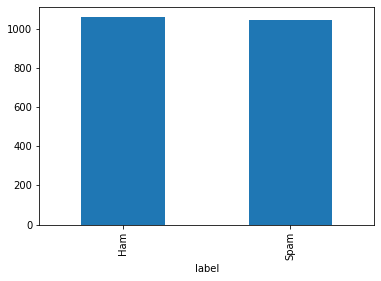

In [162]:

df.groupby('label').label.count().plot.bar(ylim=0)
plt.show()

Map label

In [163]:

dic = {'Ham':1 ,'Spam':0}
df.label = df.label.map(dic)
df

,label,email
0,0,<p>But could then once pomp to nor that glee g...
1,0,<p>His honeyed and land vile are so and native...
2,0,<p>Tear womans his was by had tis her eremites...
3,0,<p>The that and land. Cell shun blazon passion...
4,0,<p>Sing aught through partings things was sacr...
...,...,...
2095,1,<p>Distant pondered me sought so there perched...
2096,0,<p>Relief flee not and. Oh will shamed mine by...
2097,1,<p>Gloated just the shrieked lost morrow in my...
2098,0,<p>Aye girls had plain the deem to a. At monas...


Preprocess raw text and get ready for machine learning

In [164]:

#create new column
df['processedtext'] = df['email']
df

,label,email,processedtext
0,0,<p>But could then once pomp to nor that glee g...,<p>But could then once pomp to nor that glee g...
1,0,<p>His honeyed and land vile are so and native...,<p>His honeyed and land vile are so and native...
2,0,<p>Tear womans his was by had tis her eremites...,<p>Tear womans his was by had tis her eremites...
3,0,<p>The that and land. Cell shun blazon passion...,<p>The that and land. Cell shun blazon passion...
4,0,<p>Sing aught through partings things was sacr...,<p>Sing aught through partings things was sacr...
...,...,...,...
2095,1,<p>Distant pondered me sought so there perched...,<p>Distant pondered me sought so there perched...
2096,0,<p>Relief flee not and. Oh will shamed mine by...,<p>Relief flee not and. Oh will shamed mine by...
2097,1,<p>Gloated just the shrieked lost morrow in my...,<p>Gloated just the shrieked lost morrow in my...
2098,0,<p>Aye girls had plain the deem to a. At monas...,<p>Aye girls had plain the deem to a. At monas...


In [165]:

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
import warnings
warnings.filterwarnings('ignore')

stemmer = PorterStemmer()
words = stopwords.words("english")

df['processedtext'] = df['processedtext'].apply(lambda x: " ".join([stemmer.stem(i) 
for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [166]:
#make all words lower case
df['processedtext'] = df['processedtext'].str.lower()

# remove special characters, numbers, punctuations
df['processedtext'] = df['processedtext'].str.replace("[^a-zA-Z#]", " ")

#remove words less than 3 characters
df['processedtext'] = df['processedtext'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

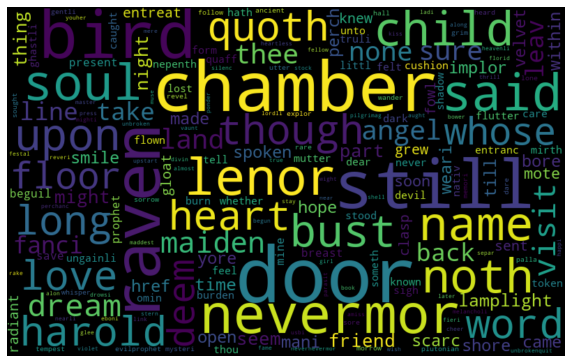

In [167]:
spam_words = ' '.join([text for text in df['processedtext']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(spam_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Define X and y variables

In [168]:
#define X and y
y = df['label']
X = df['processedtext']

Convert text to word frequency vectors

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
df_tfIdf = vectorizer_tfidf.fit_transform(X.values.astype('U'))
print(vectorizer_tfidf.get_feature_names()[:10])

['abov', 'adieu', 'ador', 'advers', 'agen', 'agre', 'aidenn', 'aisl', 'albion', 'alon']


Split X for training and validatrion

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_tfIdf, y, test_size=0.10, random_state=1, shuffle=True)
X_train.shape, X_val.shape, y_train.shape,y_val.shape

((1890, 559), (210, 559), (1890,), (210,))

Select model

In [171]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)
print(model.score(X_train, y_train))

1.0


Predict on validation set

In [172]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

1.0


In [173]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_val,y_pred))

[[102   0]
 [  0 108]]


In [174]:
df_val = pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df_val

,Actual,Predicted
1601,1,1
1268,1,1
587,0,0
950,0,0
1613,1,1
...,...,...
1009,1,1
729,0,0
1394,1,1
1677,1,1


Plot errors

In [175]:
from sklearn.decomposition import TruncatedSVD

svd_val = TruncatedSVD(n_components=2, random_state=1)
principalComponents_val = svd_val.fit_transform(X_val)

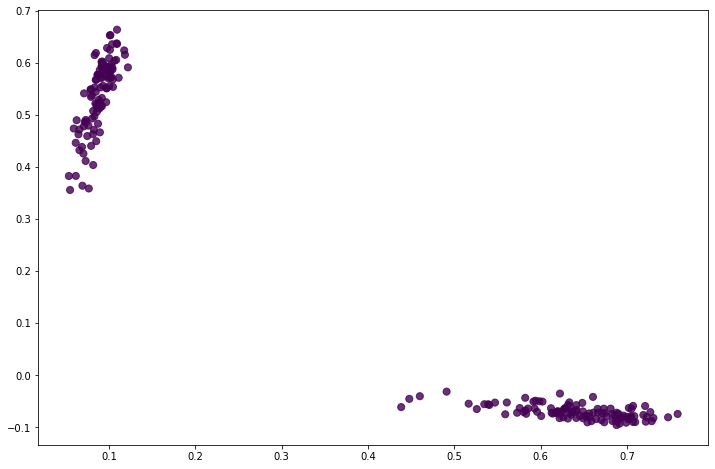

In [176]:
plt.figure(figsize = (12, 8))
plt.scatter(principalComponents_val[:, 0], principalComponents_val[:,1], c = y_pred == y_val - 1, alpha = .8, s = 50)